# Other NumPy Features and Applications
If you want to type along with me, use [this notebook](https://humboldt.cloudbank.2i2c.cloud/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fbethanyj0%2Fdata271_sp24&branch=main&urlpath=tree%2Fdata271_sp24%2Fdemos%2Fdata271_demo10_live.ipynb) instead. 
If you don't want to type and want to follow along just by executing the cells, stay in this notebook. 

In [1]:
# Whenever you want to use numpy import it with the following code
import numpy as np

### Other Useful Numpy Tools

In [8]:
# matrix multiplication
A = np.array([[1,2], [3,4]]) # 2 x 2 matrix with 1 and 2 in the first row and 3 and 4 in the second row
B = np.array([[5,6], [7,8]])
C = np.dot(A,B) # matrix multiplication
print(C)

[[19 22]
 [43 50]]


In [9]:
# statistical function
A = np.array([1, 2, 3, 4, 5, 6, 7, 9, 10])
mean = np.mean(A)
print('Mean of A is ', mean)
sd = np.std(A)
print('Standard deviation of A is ', sd)
median = np.median(A)
print('Median of A is ', median)

Mean of A is  5.222222222222222
Standard deviation of A is  2.8974232912011773
Median of A is  5.0


In [10]:
# unique values-- similar to set ({})
np.array([1, 2, 3, 2, 1, 3, 4, 4, 5, 5, 5])
B = np.unique(A)
print(B)

[ 1  2  3  4  5  6  7  9 10]


In [11]:
# masking
A = np.array([1, 2, 3, 4, 5, 6, 7, 8])
mask = A > 2
B = A[mask]
print(B)

[3 4 5 6 7 8]


In [12]:
# masking -- note that it changes dimensions
A = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
mask = A > 2
B = A[mask]
print(B)
print(A)

[3 4 5 6 7 8]
[[1 2]
 [3 4]
 [5 6]
 [7 8]]


### Linear Algebra (Optional)
Numpy has a number of linear algebra functions.  Common examples include finding eigenvalues, eigenvectors, the inverse of a matrix, the determinant, the rank and solving systems of linear equations.  More documentation can be found here: https://numpy.org/doc/stable/reference/routines.linalg.html.  This will not be emphasized in this class, but the Data Science major requires linear algebra, so being aware of this module might be helpful to you both in a linear algebra course and for applications of linear algebra in data science.

In [13]:
# linear algebra
A = np.array([[1, 2], [4,5]])
inv = np.linalg.inv(A) # returns inverse of matrix
print(inv)
evalsvecs = np.linalg.eig(A) # returns evals and then evecs
print(evalsvecs)
evals = np.linalg.eigvals(A) # returns just evals
print(evals)
det = np.linalg.det(A) # returns determinant
print(det)
rank = np.linalg.matrix_rank(A)
print(rank)

[[-1.66666667  0.66666667]
 [ 1.33333333 -0.33333333]]
(array([-0.46410162,  6.46410162]), array([[-0.80689822, -0.34372377],
       [ 0.59069049, -0.9390708 ]]))
[-0.46410162  6.46410162]
-2.9999999999999996
2


In [14]:
# solve Ax = b for x
A = np.array([[1, 2], [3, 5]])
b = np.array([1, 2])
x = np.linalg.solve(A, b)
x

array([-1.,  1.])

## Image Manipulation As Array Operations

We can open an image from our working directory and display it.  For this demo, we will use the PIL module as well as Matplotlib, which is a comprehensive library for creating visualizations in Python.  Later in this class, we will cover Matplotlib in greater detail.  For this demo, we will reuse the same few commands to display a figure, resize a figure, add a plot title, and create subplots.  Further documentation can be found here: https://matplotlib.org.

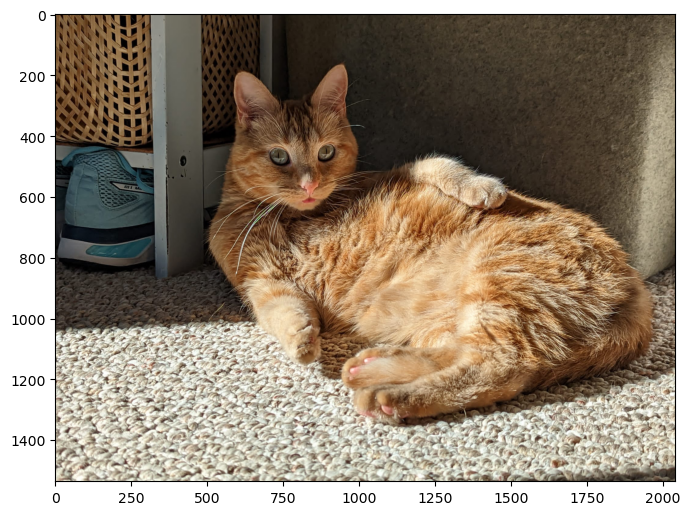

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

img = np.array(Image.open('gus_fat.JPG'))
plt.figure(figsize = (8,8))
plt.imshow(img)
plt.show() 

In [21]:
# Number of dimensions
img.ndim

3

In [22]:
# Shape
img.shape

(1536, 2040, 3)

### Negative of an Image
Each pixel contains three values for the red, green, and blue color. Each value is in the range 0-255.  The values combined make up the resultant color of the pixel.  To negatively transform an image, we subtract the value of the pixel from 255 (maximum possible value of the pixel).

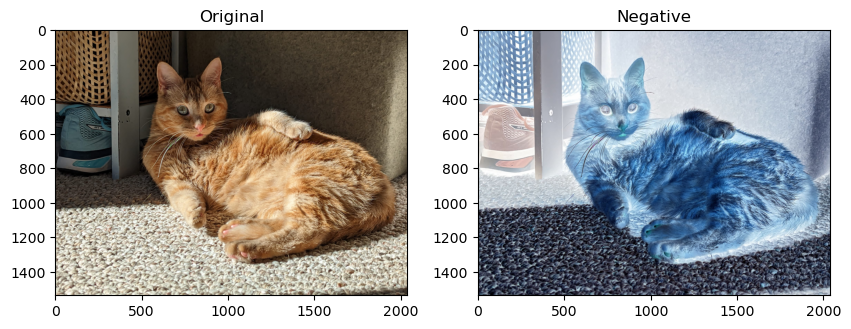

In [17]:
fig = plt.figure(figsize = (10,10))

fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')

neg_img = 255 - img # transform image
fig.add_subplot(1, 2, 2)
plt.imshow(neg_img)
plt.title('Negative')
plt.show()

### Rotation


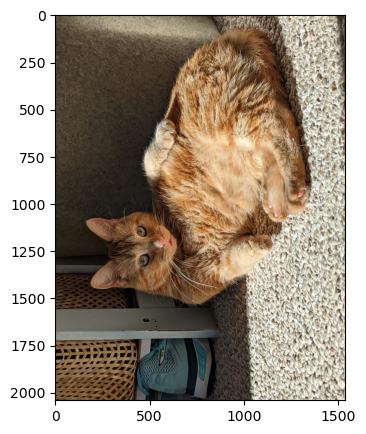

In [23]:
degrees = 90
img_rot = np.rot90(img) # rotate array 90 degree counterclockwise
plt.figure(figsize = (5,5))
plt.imshow(img_rot)
plt.show()

### Grayscale as a Weighted Mean
In digital photography, a grayscale image is one in which the value of each pixel is a single sample representing only an amount of light; that is, it carries only intensity information. Grayscale images, a kind of black-and-white or gray monochrome, are composed exclusively of shades of gray. The contrast ranges from black at the weakest intensity to white at the strongest.
The formula used gives a weight to each color channel: $Y = 0.299R + 0.587G + 0.114B$.

In [29]:
np.dot(img[:,:, :3] , [0.299 , 0.587, 0.114]).shape

(1536, 2040)

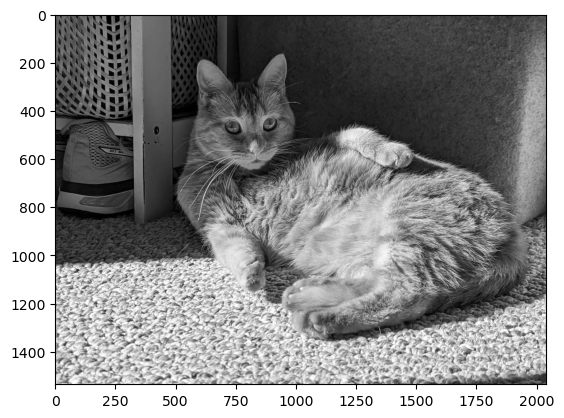

In [33]:
gray = lambda pic : np.dot(pic[... , :3] , [0.299 , 0.587, 0.114]) 

def make_gray(pic):
    return np.dot(pic[:,:, :3] , [0.299 , 0.587, 0.114]) 

gray = make_gray(img)  
plt.imshow(gray,cmap = plt.get_cmap(name = 'gray'))
plt.show()

### Split into Color Channels

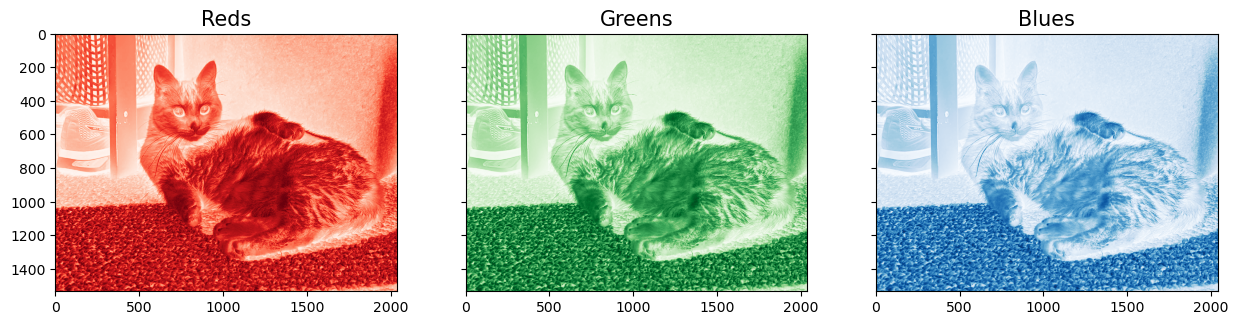

In [34]:
# function to split on color channels
def rgb_splitter(image):
    rgb_list = ['Reds','Greens','Blues']
    fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey = True) # sharey = True means y-axis shared among plots
    for i in range(3):
        ax[i].imshow(image[:,:,i], cmap = rgb_list[i]) # iterate along the color dimension
        ax[i].set_title(rgb_list[i], fontsize = 15) # give specific color title
     
rgb_splitter(img) # call function on image

### Array Slicing to Crop an Image


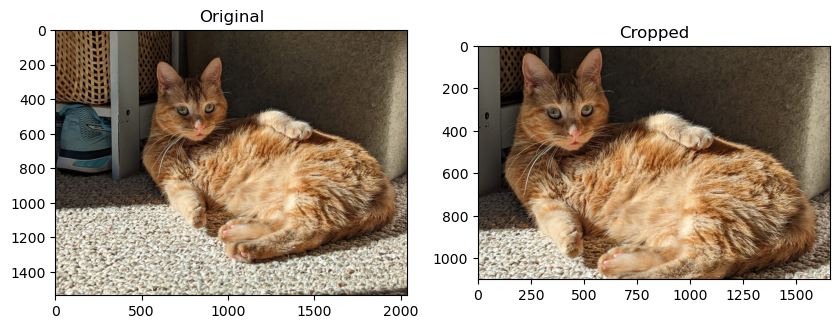

In [47]:
fig = plt.figure(figsize = (10, 10))

fig.add_subplot(1,2,1)
plt.imshow(img)
plt.title('Original')

img_crop = img[150:1250, 380:2100, :] # array slicing

fig.add_subplot(1, 2, 2)
plt.imshow(img_crop)
plt.title('Cropped')

plt.show()

### Shadows and Highlights 
These effects (which you can apply using your cell phone editor) have an impact on the intensity of image pixels within specific ranges.
We are using logical indexing and finding pixels with an intensity above a threshold and then amplifying them.

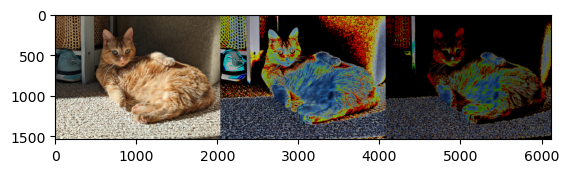

In [48]:
img_64 = np.where(img > 64, img, 0) * 255
img_128 = np.where(img > 128, img, 0) * 255

img_all = np.concatenate((img, img_64, img_128), axis = 1)
plt.imshow(img_all)
plt.show()

### Blending Images
We can combine images, and give each a weight to determine how much of it comes through.  We will use an image from a local Humboldt beach and combine it with our dog photo.

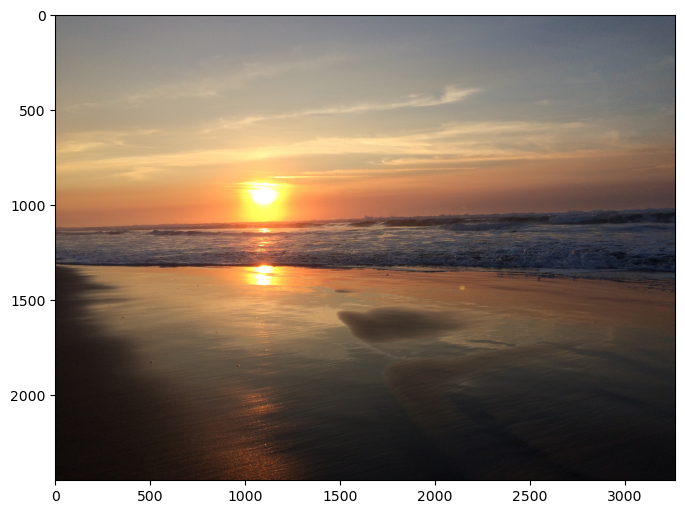

In [52]:
beach_img = np.array(Image.open('sunset.JPG'))
plt.figure(figsize = (8, 8))
plt.imshow(beach_img)
plt.show()

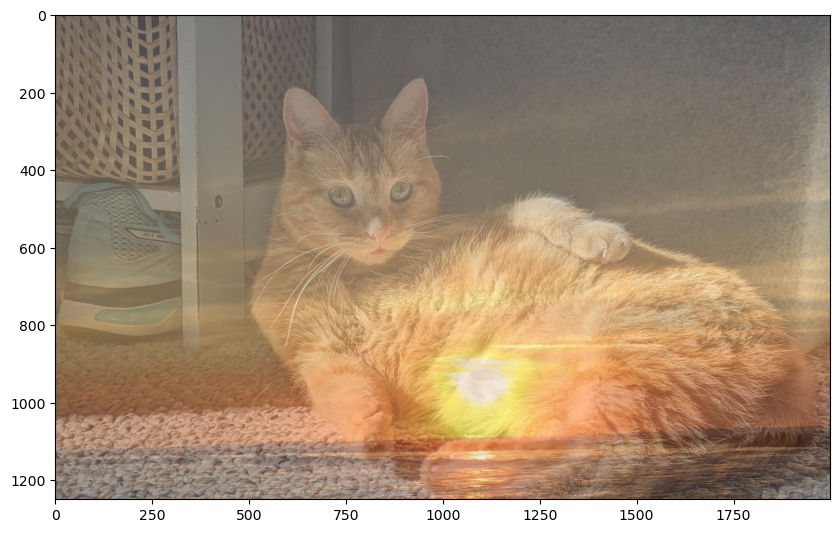

In [57]:
img_crop = img[:1250, 0:2000, :] # array slicing
beach_crop = beach_img[:1250, 0:2000, :]

# 40% gus and 60% beach
blend = (img_crop * .4 + beach_crop * .6).astype(np.uint8) # convert back to unsigned integer after multiplying by decimals

plt.figure(figsize = (10, 10))
plt.imshow(blend)
plt.show()